In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
# Definindo a arquitetura da rede neural
model = keras.models.Sequential([
    keras.Input(shape=(2,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1)
])

In [3]:
# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

In [4]:
# Exibindo um resumo da arquitetura da rede
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261 (1.02 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
n_train = 10000
X_train = np.random.rand(n_train, 2) - 0.5  # -0.5 <= x1 <= 0.5, -0.5 <= x2 <= 0.5
y_train = (16 * X_train[:, 0] ** 2 + X_train[:, 0] * X_train[:, 1] + 8 * X_train[:, 1] ** 2 - X_train[:, 0] - X_train[:, 1] + np.log(1 + X_train[:, 0] ** 2 + X_train[:, 1] ** 2))
y_train = y_train.reshape(n_train, 1)

In [6]:
n_val = n_train // 5
X_val= np.random.rand(n_val, 2) - 0.5  # -0.5 <= x1 <= 0.5, -0.5 <= x2 <= 0.5
y_val = (16 * X_val[:, 0] ** 2 + X_val[:, 0] * X_val[:, 1] + 8 * X_val[:, 1] ** 2 - X_val[:, 0] - X_val[:, 1] + np.log(1 + X_val[:, 0] ** 2 + X_val[:, 1] ** 2))
y_val = y_val.reshape(n_val, 1)

In [7]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1024, validation_data=(X_val, y_val))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 6.4675 - val_loss: 6.2301
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.1479 - val_loss: 5.8366
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.8224 - val_loss: 5.4004
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.3836 - val_loss: 4.9261
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.8134 - val_loss: 4.4077
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2605 - val_loss: 3.8421
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7076 - val_loss: 3.2466
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0966 - val_loss: 2.6639
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5889 - val_loss: 2.1439
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0991 - val_loss: 1.7510
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7706 - val_loss: 1.5180
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1

In [8]:
n_test = n_train // 5
X_test= np.random.rand(n_test, 2) - 0.5  # -0.5 <= x1 <= 0.5, -0.5 <= x2 <= 0.5
y_test = (16 * X_test[:, 0] ** 2 + X_test[:, 0] * X_test[:, 1] + 8 * X_test[:, 1] ** 2 - X_test[:, 0] - X_test[:, 1] + np.log(1 + X_test[:, 0] ** 2 + X_test[:, 1] ** 2))
y_test = y_test.reshape(n_test, 1)

In [9]:
test_loss = model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 0.0051


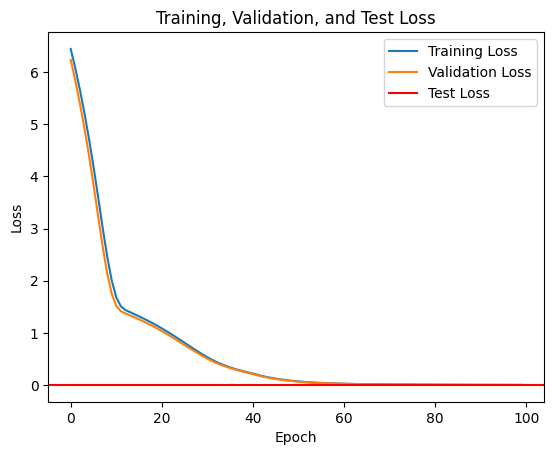

In [10]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='-', label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()
plt.show()

In [11]:
print("Test Loss:", test_loss)

Test Loss: 0.005439470987766981
